In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from  sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from  sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from functools import reduce
import math
import xgboost as xgb
import sklearn.metrics as mt

In [8]:
null_values = ["Intf Shut","Out of Serv","I/O Timeout","Bad","Scan Timeout","Calc Failed","X"]
df_data = pd.read_csv('Datos5.csv',sep=';',na_values=null_values,parse_dates=[0])
df_data.dropna(axis=0, inplace=True)
df_data.reset_index(drop=True, inplace=True)

In [9]:
df_data.describe()

,FEA005 Peso,FEA006 Peso,FEA007 Peso,FEA008 Peso,CV5 Solidos,CV5 Peso,CV15 Peso,CV11 Peso,SAG Potencia,SAG Corriente,...,SF6 Gru,SF7 Fino,SF7 Int1,SF7 Int2,SF7 Gru,SF8 Fino,SF8 Int1,SF8 Int2,SF8 Gru,Laboratorio
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,...,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,33.859643,29.328131,23.122986,22.142899,74.216690,4079.664598,500.315474,537.049018,21130.819429,3504.683687,...,6.647509,40.639958,28.375620,24.372241,6.484518,34.472373,23.596152,29.206150,12.600191,267.901010
std,19.210618,30.265010,8.092766,24.098843,2.459432,632.710920,179.426551,136.595269,3465.779796,531.402513,...,2.173336,2.782752,1.423387,1.740292,1.404856,2.337737,1.664860,1.623117,2.361953,19.102231
min,11.659936,-40.981039,-7.739352,-48.136340,68.743238,242.505180,22.003616,20.037019,987.152500,327.224454,...,4.634569,22.435505,17.374065,20.628846,4.067941,28.666748,18.852460,26.283517,6.690708,225.879370
25%,27.759469,18.848020,17.682425,9.805303,72.421913,4116.154110,411.125616,465.933204,20806.001840,3488.348218,...,5.908572,39.593776,28.089445,23.374106,5.788577,33.024501,22.417568,27.997551,10.980177,252.253119
50%,30.957126,26.532281,22.946908,19.190868,74.229939,4203.551148,465.053245,577.615461,22300.130580,3635.160035,...,6.273406,40.956638,28.584708,24.060682,6.284183,34.394535,23.508469,29.263802,12.635594,266.759959
75%,35.695359,34.314483,28.639545,30.052233,75.539422,4346.724074,638.592798,636.981706,22802.131420,3741.106726,...,6.650823,42.006099,29.012309,25.151968,6.787575,36.228997,24.976355,30.373460,14.313246,282.753586
max,151.790270,233.908067,44.567049,182.343954,83.620716,4588.712401,897.304848,777.625940,23631.154380,3866.490248,...,21.261744,46.824331,29.709429,33.141083,15.567521,39.022018,26.510013,33.436783,18.387864,307.324914


#### Graficas > Time

#### OUTLIERS

In [10]:
def plot_cats(df,x,y,title):
    plot = sns.catplot(data=df, x=x,y=y, kind="bar",height=5, aspect=4).set(title=title)
    plot.set_xticklabels(rotation=45);
    
    
    
def detect_outliers(df, z_feats=[], skew_feats=[], other=[], m2=[]):
    outliers_lst = []
    for f in z_feats:
        up_lim = df[f].mean() + 3*df[f].std()
        low_lim = df[f].mean() - 3*df[f].std()
        df_out = df[(df[f] > up_lim) | (df[f] < low_lim)]
        out_n = len(df_out)
        out_p = np.round((out_n/len(df))*100,2)
        outliers_lst.append({"Feature":f, "Upper_Limit": up_lim, "Lower_Limit":low_lim, 
                             "Outier_N":out_n, "Outlier_%":out_p})
    for f in skew_feats:
        Q1 = df[f].quantile(0.25)
        Q3 = df[f].quantile(0.75)
        IQR = Q3-Q1
        scale = 1.5 # used scale 2.5 instead 1.5
        low_lim = Q1 - (scale * IQR) 
        up_lim = Q3 + (scale * IQR)
        df_out = df[(df[f] > up_lim) | (df[f] < low_lim)]
        out_n = len(df_out)
        out_p = np.round((out_n/len(df))*100,2)
        outliers_lst.append({"Feature":f, "Upper_Limit": up_lim, "Lower_Limit":low_lim, 
                             "Outier_N":out_n, "Outlier_%":out_p}) 
    for f in other:
        up_lim = df[f].quantile(0.99)
        low_lim = df[f].quantile(0.01)
        df_out = df[(df[f] > up_lim) | (df[f] < low_lim)]
        out_n = len(df_out)
        out_p = np.round((out_n/len(df))*100,2)
        outliers_lst.append({"Feature":f, "Upper_Limit": up_lim, "Lower_Limit":low_lim, 
                             "Outier_N":out_n, "Outlier_%":out_p})
        
    for f in m2:
        Q1 = df[f].quantile(0.25)
        Q3 = df[f].quantile(0.75)
        IQR = Q3-Q1
        scale = 2.5 
        low_lim = max((Q1 - (scale * IQR)),0)
        up_lim = Q3 + (scale * IQR)
        df_out = df[(df[f] > up_lim) | (df[f] < low_lim)]
        out_n = len(df_out)
        out_p = np.round((out_n/len(df))*100,2)
        outliers_lst.append({"Feature":f, "Upper_Limit": up_lim, "Lower_Limit":low_lim, 
                             "Outier_N":out_n, "Outlier_%":out_p}) 

    return outliers_lst


def plot_outliers(df, df_out):
    a = 8
    b = 2
    c = 1
    fig = plt.figure(figsize = (20,20))
    for col in df.columns[1:]:
        
        low_lim = float(df_out.loc[df_out["Feature"] == col,"Lower_Limit"])
        up_lim = float(df_out.loc[df_out["Feature"] == col,"Upper_Limit"])
        df_filter = df[(df[col] > up_lim) | (df[col] < low_lim)]
        df_ok = df[~df.index.isin(df_filter.index)]
        
        x_ok = df_ok["Timestamp"]
        y_ok = df_ok[col]
        x = df_filter["Timestamp"]
        y = df_filter[col]
        
        plt.subplot(a,b,c)
        plt.title('{}'.format(col))
        plt.plot(x,y,'r.',x_ok,y_ok,"k.")
        plt.axhline(y = up_lim, color = 'red')
        plt.axhline(y = low_lim, color = 'red')
        c=c+1
    fig.tight_layout()

In [11]:
out_lst = detect_outliers(df_data,z_feats=["PSM1 L1","PSM1 L2"], skew_feats=['FEA005 Peso', 'FEA006 Peso', 'FEA007 Peso', 'FEA008 Peso', 'CV5 Solidos',
                                                      'CV5 Peso', 'CV15 Peso', 'CV11 Peso',
                                                      'SAG Potencia', 'SAG Corriente','W1 Velocidad',
                                                      'N1 Presion' , 'N1 Sensor z' , 'N1 Densidad' ,             
                                                      'N3 Flujo' , 'N3 Sensor Z' , 'SCV5 Fino' , 'SCV5 Int1' ,
                                                      'SCV5 Int2' , 'SCV5 Gru' , 'SF5 Fino' , 'SF8 Fino' , 'SF8 Int1' , 'SF8 Int2' , 'SF8 Gru'],
                          other=['SUL Nivel', 'MB1 Potencia','MB1 Velocidad', 'MB1 Torque','MB1 Peso'])

df_outliers = pd.DataFrame(out_lst)
df_outliers

,Feature,Upper_Limit,Lower_Limit,Outier_N,Outlier_%
0,PSM1 L1,352.734599,167.264894,1,1.18
1,PSM1 L2,349.770288,160.542674,2,2.35
2,FEA005 Peso,47.599195,15.855633,4,4.71
3,FEA006 Peso,57.514177,-4.351674,3,3.53
4,FEA007 Peso,45.075225,1.246745,1,1.18
5,FEA008 Peso,60.422628,-20.565092,3,3.53
6,CV5 Solidos,80.215687,67.745648,3,3.53
7,CV5 Peso,4692.579020,3770.299164,9,10.59
8,CV15 Peso,979.793572,69.924842,2,2.35
9,CV11 Peso,893.554460,209.360451,2,2.35


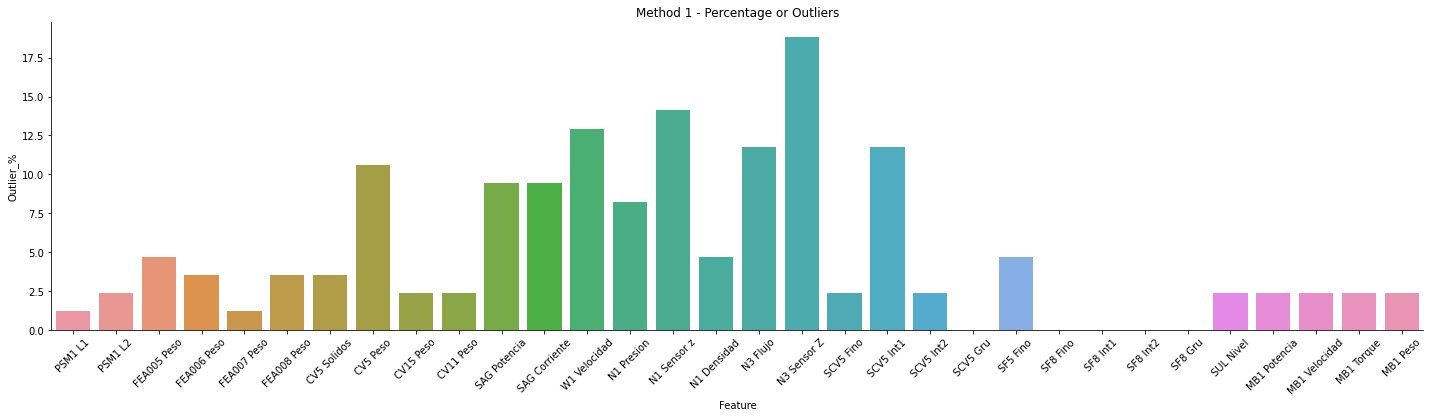

In [12]:
plot_cats(df_outliers,"Feature","Outlier_%","Method 1 - Percentage or Outliers")

#### Discretizar fuera de rangos

In [13]:
df_data = df_data[(df_data['PSM1 L1'] > 208 ) ]
df_data = df_data[(df_data['PSM1 L2'] > 208 ) ]

In [14]:
out_lst = detect_outliers(df_data,z_feats=["PSM1 L1" , "PSM1 L2"], skew_feats=['FEA005 Peso', 'FEA006 Peso', 'FEA007 Peso', 'FEA008 Peso', 'CV5 Solidos',
                                                      'CV5 Peso', 'CV15 Peso', 'CV11 Peso',
                                                      'SAG Potencia', 'SAG Corriente','W1 Velocidad',
                                                      'N1 Presion' , 'N1 Sensor z' , 'N1 Densidad' ,             
                                                      'N3 Flujo' , 'N3 Sensor Z' ,  'SCV5 Fino' , 'SCV5 Int1' ,
                                                      'SCV5 Int2' , 'SCV5 Gru' , 'SF5 Fino' , 'SF8 Fino' , 'SF8 Int1' , 'SF8 Int2' , 'SF8 Gru'],
                          other=['SUL Nivel', 'MB1 Potencia','MB1 Velocidad', 'MB1 Torque','MB1 Peso'])

df_outliers = pd.DataFrame(out_lst)
df_outliers

,Feature,Upper_Limit,Lower_Limit,Outier_N,Outlier_%
0,PSM1 L1,320.886771,208.153165,0,0.00
1,PSM1 L2,300.083000,221.645965,0,0.00
2,FEA005 Peso,47.506258,15.911395,2,2.47
3,FEA006 Peso,56.591634,-2.814102,1,1.23
4,FEA007 Peso,44.805220,2.554024,0,0.00
5,FEA008 Peso,58.610176,-17.544339,1,1.23
6,CV5 Solidos,79.717278,68.044693,1,1.23
7,CV5 Peso,4662.901434,3822.000151,6,7.41
8,CV15 Peso,995.980574,66.192804,0,0.00
9,CV11 Peso,897.256729,220.938855,0,0.00


### Correlacion

In [15]:
def plot_corr(df,title, fig_size=(20,5)):
    plt.figure(figsize=fig_size)
    sns.heatmap(df.corr(), annot = True)
    plt.title(title);

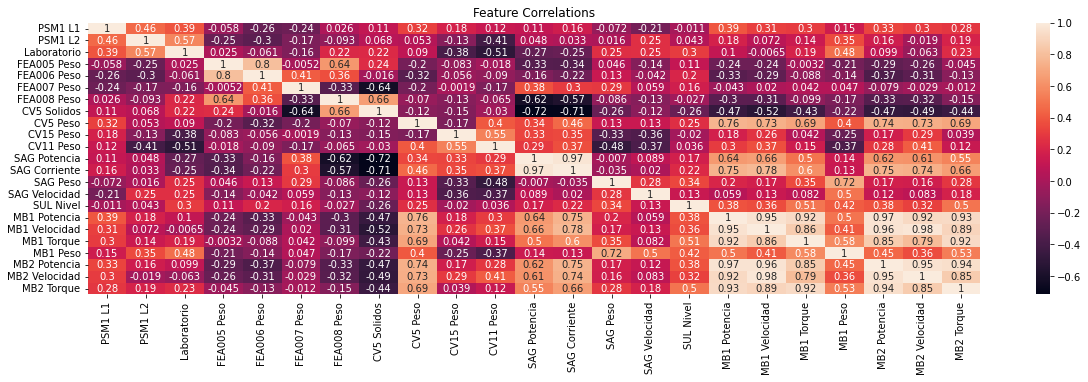

In [19]:
df_data_procesada1 = df_data.iloc[:, [38,39,60,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
plot_corr(df_data_procesada1,"Feature Correlations")


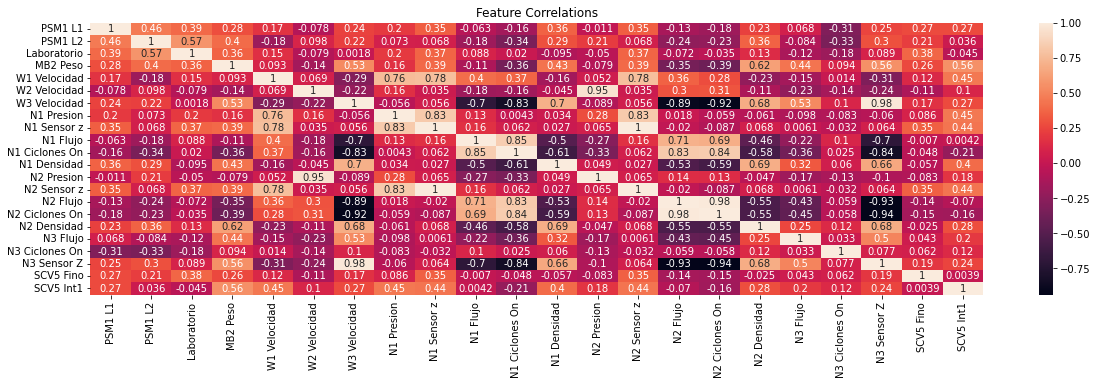

In [20]:
df_data_procesada2 = df_data.iloc[:, [38,39,60,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,40,41]]
plot_corr(df_data_procesada2,"Feature Correlations")


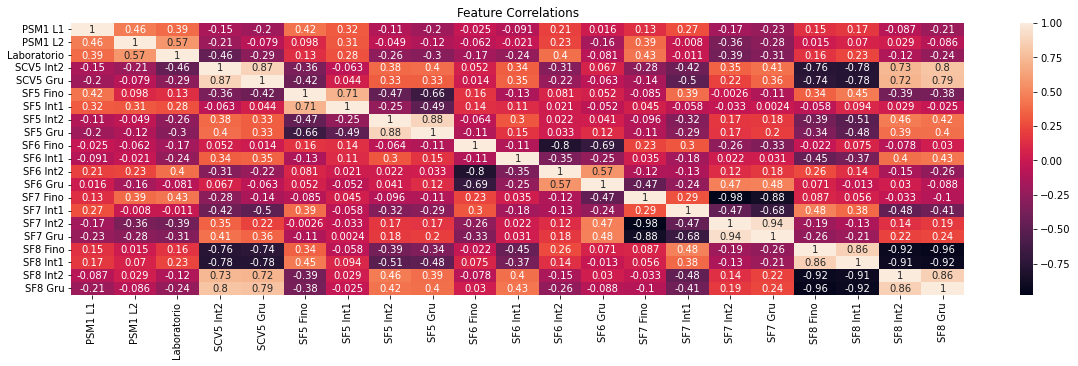

In [21]:
df_data_procesada3 = df_data.iloc[:, [38,39,60,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59]]
plot_corr(df_data_procesada3,"Feature Correlations")
38,39,60,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
..,..,60,42,43,44,45,46,47,48,49,50,..,52,54,55,56,57,58,59

# >>> PSM1 Laboratorio <<< 

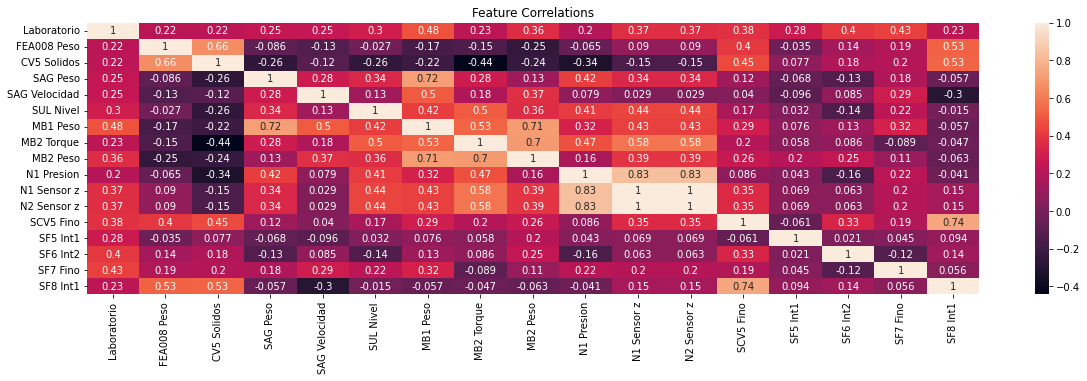

In [28]:
df_data_procesadaL2 = df_data.iloc[:, [60,4,5,11,12,13,17,20,21,25,26,31,40,45,50,52,57]]
plot_corr(df_data_procesadaL2,"Feature Correlations")
#3,4,5,7,8,9,10,11,12,13,16,17,20,21,22,25,26,31,34,35,36,
#40,42,43,44,45,46,47,48,49,50,52,54,55,56,57,58,59

In [30]:
porcentaje_test = 0.2 #@param {type:"slider", min:0, max:1, step:0.01}

X = df_data_procesadaL2.iloc[:, 1:16]
y = df_data_procesadaL2['Laboratorio']


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = porcentaje_test)

print("Ejecutado correctamente!")
print('Datapoints en train={}'.format(X_train.shape[0]))
print('Datapoints en test={}'.format(X_test.shape[0]))

Ejecutado correctamente!
Datapoints en train=64
Datapoints en test=17


In [31]:
n_features = 7 #@param {type:"slider", min:1, max:18, step:1}
n_trees = 221 #@param {type:"slider", min:1, max:1000, step:20}
escalar_caracteristicas = False #@param ["True", "False"] {type:"raw"}
escalador = "Standard" #@param ["MinMax", "Standard"]

clf = RandomForestRegressor(n_estimators=n_trees, max_features=n_features)
if escalador=="Standard": 
  scaler = StandardScaler()
else:
  scaler = MinMaxScaler()

if escalar_caracteristicas:
  scaler.fit(X_train)
  clf.fit(scaler.transform(X_train), y_train)
  print("Coeficiente de Determinación (train)= {0:.2f}%".format(clf.score(scaler.transform(X_train), y_train)*100))
  print("Coeficiente de Determinación (test)= {0:.2f}%".format(clf.score(scaler.transform(X_test), y_test)*100))
  
else:
  clf.fit(X_train, y_train)
  print("Coeficiente de Determinación (train)= {0:.2f}%".format(clf.score(X_train, y_train)*100))
  print("Coeficiente de Determinación (test)= {0:.2f}%".format(clf.score(X_test, y_test)*100))

Coeficiente de Determinación (train)= 94.23%
Coeficiente de Determinación (test)= 83.31%


In [33]:
import pickle# open a file, where you ant to store the data
archivoModelo = open('modeloP80Labo.p', 'wb')

# dump information to that file
pickle.dump(clf, archivoModelo)

archivoModelo.close()

In [34]:
X

,FEA008 Peso,CV5 Solidos,SAG Peso,SAG Velocidad,SUL Nivel,MB1 Peso,MB2 Torque,MB2 Peso,N1 Presion,N1 Sensor z,N2 Sensor z,SCV5 Fino,SF5 Int1,SF6 Int2,SF7 Fino
0,38.137053,76.171131,3168.531444,8.319559,62.937528,2458.074954,12490.16514,2448.980926,93.022890,48.305434,48.305434,61.680258,24.871246,26.878121,38.705553
1,33.883393,75.614675,3151.990092,8.755911,77.021375,2462.944764,12474.72307,2451.504975,86.643973,47.920640,47.920640,52.195746,25.258232,25.786037,40.621796
2,22.601811,73.267639,3170.303083,9.062199,74.207476,2464.911434,12550.61925,2449.484254,102.705949,47.460186,47.460186,43.618322,24.619822,26.080034,39.632564
3,15.665844,72.042747,3169.656568,9.188849,72.353512,2472.774652,12498.38773,2453.281473,102.311729,47.390233,47.390233,41.266045,23.621323,25.376726,41.549098
4,20.477669,73.986780,3164.426961,9.182958,74.446949,2475.675776,12486.08092,2446.048015,104.317503,46.959425,46.959425,44.239249,21.618453,23.830642,42.703541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,29.652169,75.862861,3185.298490,8.921065,76.127587,2499.688193,13056.47609,2479.459247,102.966594,47.908786,47.908786,52.728082,28.221062,25.894042,41.908191
81,30.052233,75.633553,3195.070966,9.000248,82.182867,2507.315176,13015.54707,2480.665547,103.744648,48.284252,48.284252,48.674275,28.194670,26.080423,41.959485
82,6.593512,73.279309,3210.784525,9.086620,80.291503,2503.584845,13019.91157,2473.345205,103.744737,47.788958,47.788958,45.844666,27.542903,23.673152,39.994853
83,1.267699,72.370790,3208.753293,9.092831,84.603283,2499.862642,13006.12382,2469.082085,101.706161,47.989221,47.989221,34.595672,27.205114,24.893629,40.391098
